# <span style="color:crimson">A/B Testing - Landing Page</span> <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT8IV3t69o_JY0-05dvAyzSSKy2QORdN-1ggUMzLO75wuJoZ2ZA-KSMl9KjIdgczRoqw4I&usqp=CAU" align='right' style="width: 100px;"/>

 

**Description of the A/B Testing Analysis:**

A company selling a high-value service wants to determine which of two web presentations is more effective at selling. Due to the high value and infrequent nature of the sales, as well as the lengthy sales cycle, it would take too long to accumulate enough sales data to identify the superior presentation. Therefore, the company uses a proxy variable to measure effectiveness.

The dataset includes a total of 36 sessions across the two web presentations: 21 sessions for page A and 15 sessions for page B.

- **Control Group (Page A):** current view page.
  
- **Test Group (Page B):** new view page.


The dataset includes the following metrics split in two datasets:
- **Page:** The web page presentation viewed by the user.
- **Time:** The amount of time that the user spent on the web page during their session.The time is expressed in hundredths of seconds. For example, a value of 0.1 indicates 10 seconds, and a value of 2.53 indicates 253 seconds.


**Test Aims:**

The mission is to unearth the most advantageous approach for the company. Based on the following goal:

- The goal is to determine if users spend more time on page B compared to page A. If users spend more time on page B, it would suggest that page B is more effective at engaging potential customers, and therefore, does a better selling job.

- **Null Hypothesis (H₀):** There is no significant difference in the number of purchases between the control group (Page A) and the test group (Page B).
- **Alternative Hypothesis (H₁):** Moving to a new landing page version (Page B) produce an increase in the time that users spend on the new version

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.stats.power import TTestIndPower
from statsmodels.stats.weightstats import ztest as ztest
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/kaggle/input/landing-page-ab-testing-dataset/web_page_data.csv')

df.head()


In [ ]:
#Check if there is any missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

In [ ]:
#Total time and mean by landing page
total_time = df.groupby('Page').agg({'Time': [lambda x: (x.sum() * 100), 'mean']}).round(2)
total_time.columns = ['Sum_time', 'Mean_Time']

total_time

## <span style="color:crimson">A/B Test</span>

In [ ]:
# Separate data for each group
page_A = df[df['Page'] == 'Page A']['Time']
page_B = df[df['Page'] == 'Page B']['Time']

# Perform an independent two-sample t-test
t_stat, p_value = stats.ttest_ind(page_A, page_B, equal_var=False)

# Output the results
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# Evaluate the null hypothesis
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis (H₀): The means are significantly different.")
else:
    print("Fail to reject the null hypothesis (H₀): The means are not significantly different.")

In [ ]:
# Calculate sample means, variances, and sizes for each group
mean_page_a = page_A.mean()
mean_page_b = page_B.mean()
var_page_a= page_A.var(ddof=1)
var_page_b = page_B.var(ddof=1)
n_page_a = len(page_A)
n_page_b = len(page_B)

# Calculate the difference in means
mean_diff = mean_page_b - mean_page_a

# Standard error of the difference in means
se_diff = np.sqrt(var_page_a / n_page_a + var_page_b / n_page_b)

# Degrees of freedom for Welch's t-test
degrees_freedom = 1

# Critical t-value for 95% confidence interval
t_critical = stats.t.ppf(1 - 0.025, degrees_freedom)

# Confidence interval
ci_lower = mean_diff - t_critical * se_diff
ci_upper = mean_diff + t_critical * se_diff
confidence_interval = (ci_lower, ci_upper)

# Output the results
print(f"Mean Difference: {mean_diff:.4f}")
print(f"95% Confidence Interval: ({ci_lower:.4f}, {ci_upper:.4f})")


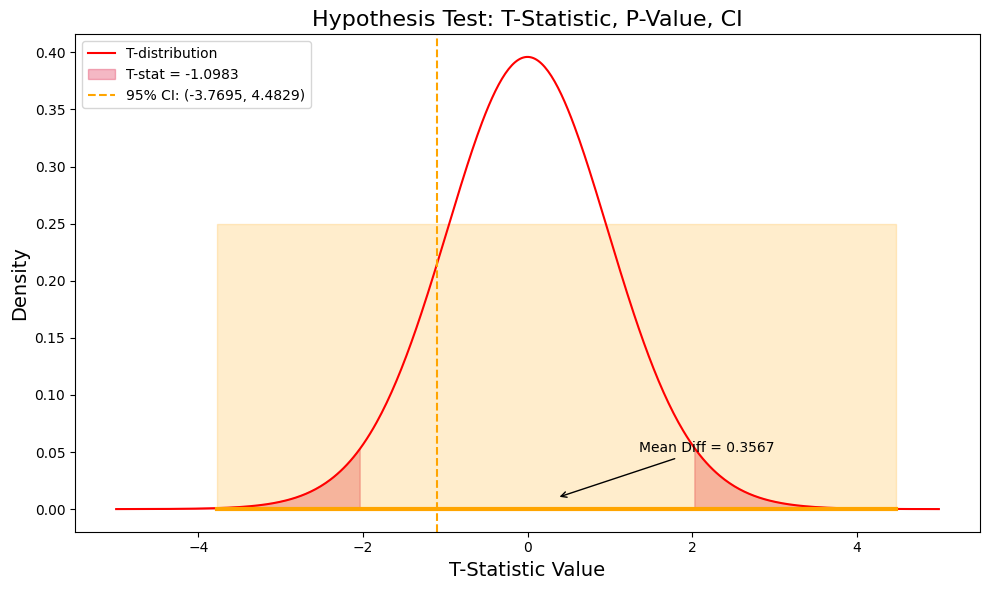

In [7]:
# Given results
t_stat, p_value, mean_diff, conf_interval = -1.0983, 0.2815, 0.3567, (-3.7695, 4.4829)
degree_freedom = 34  # degrees of freedom

# Plot
x = np.linspace(-5, 5, 500)
fig, ax = plt.subplots(figsize=(10, 6))

# T-distribution curve and critical region
ax.plot(x, stats.t.pdf(x, degree_freedom), color="red")
ax.fill_between(x, 0, stats.t.pdf(x, degree_freedom), where=(x > stats.t.ppf(1 - 0.025, degree_freedom)) | (x < stats.t.ppf(0.025, degree_freedom)), color="crimson", alpha=0.3)

# T-statistic and confidence interval
ax.axvline(t_stat, color="orange", linestyle="--")
ax.plot([conf_interval[0], conf_interval[1]], [0, 0], color="orange", lw=3)
ax.fill_betweenx([0, 0.25], conf_interval[0], conf_interval[1], color="orange", alpha=0.2)

# Annotations and labels
ax.annotate(f'Mean Diff = {mean_diff:.4f}', xy=(mean_diff, 0.01), xytext=(mean_diff + 1, 0.05), arrowprops=dict(facecolor='black', arrowstyle='->'))
ax.set_xlabel("T-Statistic Value", fontsize=14)
ax.set_ylabel("Density", fontsize=14)
ax.set_title("Hypothesis Test: T-Statistic, P-Value, CI", fontsize=16)
ax.legend(["T-distribution", f"T-stat = {t_stat:.4f}", f"95% CI: {conf_interval}"], loc='upper left')

# Show plot
plt.tight_layout()
plt.show()

##  <span style="color:crimson"> A/B TEST Landing Page Conclusion</span>

###  <span style="color:orange">Results</span>

- P-Value:  0.2815
- Fail to reject the null hypothesis (H₀): The means are not significantly different.
- Mean Difference: 0.3567
- 95% Confidence Interval: (-3.7695, 4.4829)

###  <span style="color:blue">Conclusion</span>
Based on the results, there is no statistically significant difference in the time spent by users on the website between the control group (Page A) and the test group (Page B).

The p-value of 0.2815 exceeds the typical significance threshold of 0.05, meaning we fail to reject the null hypothesis in both cases.

Additionally, the mean difference and 95% confidence intervals for both metrics include zero, further indicating that the changes in the test group do not significantly impact user behavior compared to the control group.

As there is no meaningful difference in the time spent on Page B versus Page A, it suggests that Page B is not more effective at engaging potential customers.
